# Data Project

This data project conducts an analysis of the income for males and females in Denmark. The project is based on average income data (total income before tax) from 2010-2019 for males and females, respectively.

# Read and clean data

There are predominantly two ways of importing data:

1. Download and manually import
2. Fetch data using a so-called API

While the first method is the conventional way, it may seem like the optimal way to import data. However, there are several reasons that fetching with an API is a more prudent method. Reading data using an API ensures that data is always up to date, as it reads in the data from a server in the cloud (naturally one has to refresh the fetching mechanism to refresh data). Hence, it ensures alignment when multiple users are able to fetch data from an identical source. Therefore, it is the preferred method and also the one applied throughout this data project.

## Read Data

In [12]:
#We begin by importing the necessary modules to complete the data project. 
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Secondly, we setup the data fetcher with the language setting 'english'
Dst = pydst.Dst(lang='en')

#Then we load the fourth subject, which is equivalent to 'Labour, income and wealth'
tables = Dst.get_tables(subjects=['04'])
tables

#Next we load the respective table "INDKP101", which denotes "Personer over 14 år efter område, enhed, køn og indkomsttype"
tables[tables.id == 'INDKP101']

#Finally, we specify and filter the data such that dataframe only contains the desired data. The desired data can be summarized as follows:
##Includes all ares of Denmark
##Includes males and females, respectively
##Spans over a period of 10 years (2010-2019)
##Based on average Income for all people in DKK

variables = {'OMRÅDE':['*'],'KOEN':['M','K'],'TID':['*'],'ENHED':['116'],'INDKOMSTTYPE':['105']}
inc_api = Dst.get_data(table_id = 'INDKP101', variables=variables)
inc_api.head(10)

,OMRÅDE,KOEN,TID,ENHED,INDKOMSTTYPE,INDHOLD
0,Assens,Women,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",242657
1,Faaborg-Midtfyn,Men,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",287898
2,Faaborg-Midtfyn,Women,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",240525
3,Kerteminde,Men,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",299005
4,Kerteminde,Women,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",241760
5,Nyborg,Men,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",292124
6,Nyborg,Women,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",242644
7,Odense,Men,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",285224
8,Odense,Women,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",237685
9,Svendborg,Men,2012,Average income for all people (DKK),"2 Pre-tax Income, total (3+7+22+26+29)",296402


## Clean data

In [13]:
#We star by defining a dictionary in order to rename columns such that they are more intuitive
columns_dict = {}
columns_dict['OMRÅDE'] = 'Area'
columns_dict['KOEN'] = 'Sex'
columns_dict['TID'] = 'Year'
columns_dict['INDHOLD'] = 'Income (DKK)'

inc_api.rename(columns=columns_dict,inplace=True)

#Next, we realize that the two columns "ENHED" and "INDKOMSTTYPE" are negliable for the analysis of the income data, given that it is already highlighted in the introduction.
#Hence, we remove this from the dataframe.
inc_api_clean = inc_api.drop(['ENHED','INDKOMSTTYPE'], axis=1)

inc_api_clean.head(10)

,Area,Sex,Year,Income (DKK)
0,Assens,Women,2012,242657
1,Faaborg-Midtfyn,Men,2012,287898
2,Faaborg-Midtfyn,Women,2012,240525
3,Kerteminde,Men,2012,299005
4,Kerteminde,Women,2012,241760
5,Nyborg,Men,2012,292124
6,Nyborg,Women,2012,242644
7,Odense,Men,2012,285224
8,Odense,Women,2012,237685
9,Svendborg,Men,2012,296402


In [14]:
#Now that we have narrowed it down to the desired columns, we want to ensure that the data is clean and ready for an analysis. 
#In this project, we wish conduct an analysis of incomes in Denmark for males and females across municipalities. 
#However, the dataframe currenty consists of data for provinces and regions, which are not applicable for this analysis. 
#Therefore, we remove these unwanted rows from the dataframe.

I = inc_api_clean.Area.str.contains('Region')
I |= inc_api_clean.Area.str.contains('Province')
I |= inc_api_clean.Area.str.contains('All Denmark')
inc_api_clean.loc[I, :]

inc_api_clean_municipalities = inc_api_clean.loc[I == False] # keep everything else

#Given the more narrow geographical scope, it is plausible to change the name from "Area" to "Municipality"

columns_dict_Municipality = {}
columns_dict_Municipality['Area'] = 'Municipality'

inc_api_clean_municipalities.rename(columns=columns_dict_Municipality,inplace=True)

inc_api_clean_municipalities.head(10)

C:\Users\KarimAoussar\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Municipality,Sex,Year,Income (DKK)
0,Assens,Women,2012,242657
1,Faaborg-Midtfyn,Men,2012,287898
2,Faaborg-Midtfyn,Women,2012,240525
3,Kerteminde,Men,2012,299005
4,Kerteminde,Women,2012,241760
5,Nyborg,Men,2012,292124
6,Nyborg,Women,2012,242644
7,Odense,Men,2012,285224
8,Odense,Women,2012,237685
9,Svendborg,Men,2012,296402


In [15]:
#Finally, we can begin looking at analyzing the data. However, we realize that showing summary statistics as is would yield non-value add metrics for year in this dataframe. 
#Hence, we remove "Year" as a columns before conducting the summary statistics. The Final result is shown in the Analysis section.

inc_api_clean_Year = inc_api_clean_municipalities.drop('Year', axis=1)

# Analysis

In [16]:
#There are several ways to demonstrate the income data from the cleansed dataframe, and the simple version would be raw summary statistics.

inc_api_clean_Year.describe()

,Income (DKK)
count,6468.000000
mean,232569.249691
std,83014.714185
min,76994.000000
25%,170252.750000
50%,229986.500000
75%,280494.500000
max,865484.000000


In [17]:
#However, this assignment is particularly interested in assessing the differences in income levels between men and women the past 10 years across municipalities. 
#Hence, it is important to have more intuitive frame for conducting the analysis. 
#A solution is to group the data by municipality and sex.

inc_api_clean_Year.groupby(['Municipality','Sex']).describe()

Income (DKK)                                         \
                          count           mean           std       min   
Municipality Sex                                                         
Aabenraa     Men           33.0  245569.575758  59903.208807  143544.0   
             Women         33.0  182520.121212  55198.956328   88880.0   
Aalborg      Men           33.0  244445.303030  60864.624807  145687.0   
             Women         33.0  188834.515152  55727.821279   95511.0   
Aarhus       Men           33.0  256601.303030  65087.424214  154219.0   
...                         ...            ...           ...       ...   
Viborg       Women         33.0  192997.848485  58564.827581   95352.0   
Vordingborg  Men           33.0  229068.060606  57552.977219  134180.0   
             Women         33.0  187036.575758  55590.200953   94712.0   
Ærø          Men           33.0  214429.454545  55236.206441  119960.0   
             Women         33.0  169374.484848  53644.505524   76994.0   

                                                            
                         25%       50%       75%       max  
Municipality Sex                                            
Aabenraa     Men    197763.0  246962.0  292153.0  344838.0  
             Women  136689.0  183594.0  232337.0  267410.0  
Aalborg      Men    192364.0  245210.0  293442.0  344338.0  
             Women  141319.0  189265.0  239470.0  277212.0  
Aarhus       Men    198977.0  256630.0  303606.0  370238.0  
...                      ...       ...       ...       ...  
Viborg       Women  142467.0  194733.0  247515.0  282515.0  
Vordingborg  Men    178378.0  232045.0  274464.0  323686.0  
             Women  139585.0  188597.0  236002.0  271695.0  
Ærø          Men    171826.0  215062.0  261975.0  299958.0  
             Women  124776.0  175535.0  216054.0  250649.0  

[196 rows x 8 columns]

## Copenhagen

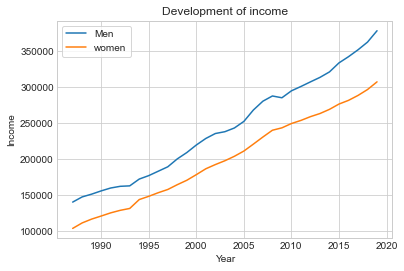

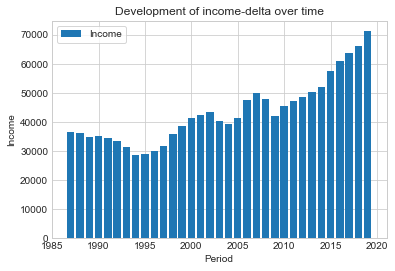

In [18]:
#Now we can better analyze the data. It can be seen what the difference is in mean income for men and women across all municipalities. 
#However, it might be interesting to have a more intuitive way to gain insight of the data.
#Therefore, I have chosen to narrow the analysis further such that it only contains the top five largest municipalities, respectively. 

#Copenhagen
I = inc_api_clean_municipalities.Municipality.str.contains('Copenhagen')
inc_api_clean_municipalities.loc[I, :]

inc_api_clean_Copenhagen = inc_api_clean_municipalities.loc[I == True] # remove everything else

#Plot
df_men = inc_api_clean_Copenhagen[inc_api_clean_Copenhagen['Sex'] == 'Men'].sort_values('Year').reset_index(drop=True)
df_women = inc_api_clean_Copenhagen[inc_api_clean_Copenhagen['Sex'] == 'Women'].sort_values('Year').reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(df_men['Year'],df_men['Income (DKK)'],label='Men')
plt.plot(df_women['Year'],df_women['Income (DKK)'],label='women')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Year')
ax.set_title('Development of income');

df_diff = df_men['Income (DKK)'] - df_women['Income (DKK)']
df_diff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.bar(df_men['Year'],df_diff,label='Income')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Period')
ax.set_title('Development of income-delta over time');


## Aarhus

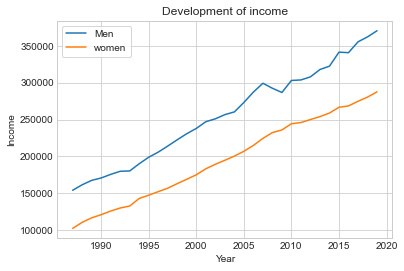

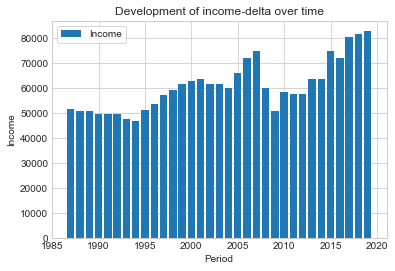

In [19]:
#Aarhus
I = inc_api_clean_municipalities.Municipality.str.contains('Aarhus')
inc_api_clean_municipalities.loc[I, :]

inc_api_clean_Aarhus = inc_api_clean_municipalities.loc[I == True] # remove everything else

#Plot
df_men = inc_api_clean_Aarhus[inc_api_clean_Aarhus['Sex'] == 'Men'].sort_values('Year').reset_index(drop=True)
df_women = inc_api_clean_Aarhus[inc_api_clean_Aarhus['Sex'] == 'Women'].sort_values('Year').reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(df_men['Year'],df_men['Income (DKK)'],label='Men')
plt.plot(df_women['Year'],df_women['Income (DKK)'],label='women')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Year')
ax.set_title('Development of income');

df_diff = df_men['Income (DKK)'] - df_women['Income (DKK)']
df_diff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.bar(df_men['Year'],df_diff,label='Income')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Period')
ax.set_title('Development of income-delta over time');

## Odense

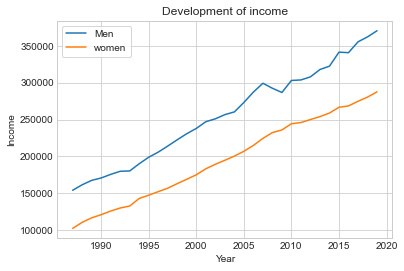

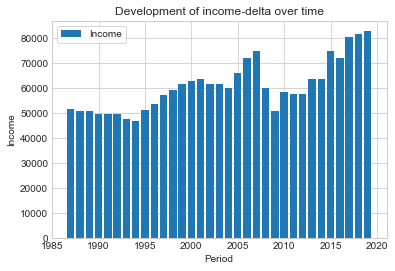

In [20]:
#Odense
I = inc_api_clean_municipalities.Municipality.str.contains('Aarhus')
inc_api_clean_municipalities.loc[I, :]

inc_api_clean_Odense = inc_api_clean_municipalities.loc[I == True] # remove everything else

#Plot
df_men = inc_api_clean_Odense[inc_api_clean_Odense['Sex'] == 'Men'].sort_values('Year').reset_index(drop=True)
df_women = inc_api_clean_Odense[inc_api_clean_Odense['Sex'] == 'Women'].sort_values('Year').reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(df_men['Year'],df_men['Income (DKK)'],label='Men')
plt.plot(df_women['Year'],df_women['Income (DKK)'],label='women')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Year')
ax.set_title('Development of income');

df_diff = df_men['Income (DKK)'] - df_women['Income (DKK)']
df_diff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.bar(df_men['Year'],df_diff,label='Income')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Period')
ax.set_title('Development of income-delta over time');

## Aalborg

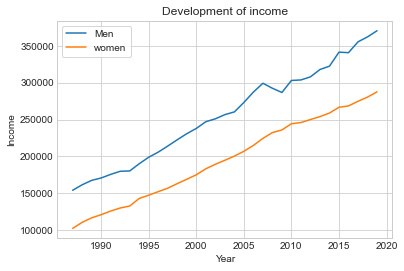

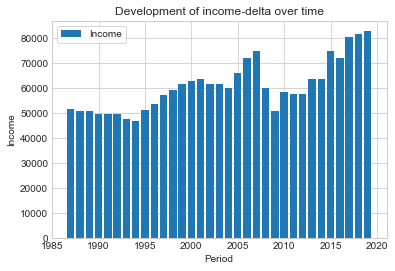

In [21]:
#Aalborg
I = inc_api_clean_municipalities.Municipality.str.contains('Aarhus')
inc_api_clean_municipalities.loc[I, :]

inc_api_clean_Aalborg = inc_api_clean_municipalities.loc[I == True] # remove everything else

#Plot
df_men = inc_api_clean_Aalborg[inc_api_clean_Aalborg['Sex'] == 'Men'].sort_values('Year').reset_index(drop=True)
df_women = inc_api_clean_Aalborg[inc_api_clean_Aalborg['Sex'] == 'Women'].sort_values('Year').reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(df_men['Year'],df_men['Income (DKK)'],label='Men')
plt.plot(df_women['Year'],df_women['Income (DKK)'],label='women')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Year')
ax.set_title('Development of income');

df_diff = df_men['Income (DKK)'] - df_women['Income (DKK)']
df_diff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.bar(df_men['Year'],df_diff,label='Income')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Period')
ax.set_title('Development of income-delta over time');

## Esbjerg

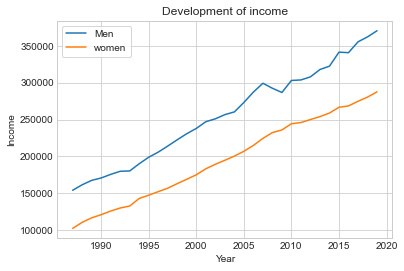

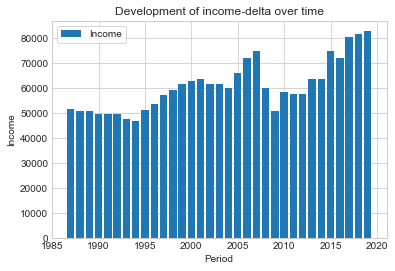

In [22]:
#Aalborg
I = inc_api_clean_municipalities.Municipality.str.contains('Aarhus')
inc_api_clean_municipalities.loc[I, :]

inc_api_clean_Esbjerg = inc_api_clean_municipalities.loc[I == True] # remove everything else

#Plot
df_men = inc_api_clean_Esbjerg[inc_api_clean_Esbjerg['Sex'] == 'Men'].sort_values('Year').reset_index(drop=True)
df_women = inc_api_clean_Esbjerg[inc_api_clean_Esbjerg['Sex'] == 'Women'].sort_values('Year').reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(df_men['Year'],df_men['Income (DKK)'],label='Men')
plt.plot(df_women['Year'],df_women['Income (DKK)'],label='women')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Year')
ax.set_title('Development of income');

df_diff = df_men['Income (DKK)'] - df_women['Income (DKK)']
df_diff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.bar(df_men['Year'],df_diff,label='Income')
ax.legend(frameon=True)

ax.set_ylabel('Income')
ax.set_xlabel('Period')
ax.set_title('Development of income-delta over time');

# Conclusion

The Pandas module as a valuable tool to clean, slice and dice data. As shown in this assignment, there are clear differences in the income before tax in the five largest 
municipalities in Denmark. The analysis shows that the devolopment in income are relatively similar. However, the levels are may seem nearly identical, but the graphs for 
"Development of income-delta over time" all demonstrate that the difference has increased over time. This trend holds true across all five municipalities, but the variation seems
less significant in Copenhagen. 